# Pulsar Classification for Class Prediction
Objective: To build a calssification model that can predict the class of an instance into 'not pulsar' (0) or 'pulsar' (1).


**Pulsar Classification For Class Prediction**
- 17898 entries

Data can be useful for prediction models of classification.

---

**COLUMNS:**

Based on Integrated Profile of Observation

1. Mean_Integrated: Mean of Observations
2. SD: Standard deviation of Observations
3. EK: Excess kurtosis of Observations
4. Skewness: In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Skewness of Observations.
5. Mean _ DMSNR _ Curve: Mean of DM SNR CURVE of Observations
6. SD _ DMSNR _ Curve: Standard deviation of DM SNR CURVE of Observations
7. EK _ DMSNR _ Curve: Excess kurtosis of DM SNR CURVE of Observations
8. Skewness _ DMSNR _ Curve: Skewness of DM SNR CURVE of Observations
9. Class: 0 - 1

---

**WHAT IS DM SNR CURVE:**

Radio waves emitted from pulsars reach earth after traveling long distances in space which is filled with free electrons. The important point is that pulsars emit a wide range of frequencies, and the amount by which the electrons slow down the wave depends on the frequency. Waves with higher frequency are sowed down less as compared to waves with higher frequency. It means dispersion.

---

**TARGET:**

Class

- 0 - It is not
- 1 - It is

## Import Libraries

In [20]:
import pandas as pd
import seaborn as sns

## Data Understanding

In [4]:
df=pd.read_csv('/content/drive/MyDrive/PulsarDataMLProject.csv')

### Data Summarization

In [8]:
df.shape

(17899, 9)

In [5]:
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17899 entries, 0 to 17898
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17899 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17899 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17899 non-null  float64
 5   SD_DMSNR_Curve        17896 non-null  float64
 6   EK_DMSNR_Curve        17899 non-null  float64
 7   Skewness_DMSNR_Curve  17899 non-null  float64
 8   Class                 17899 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [7]:
df.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,17899.000000,17898.000000,17899.000000,17898.000000,17899.000000,17896.000000,17899.000000,17899.000000,17899.000000
mean,111.075727,46.548516,0.478065,1.771610,12.615600,26.330560,8.303198,104.851994,0.091625
std,25.658495,6.844261,1.064374,6.170244,29.472511,19.472907,4.506221,106.514308,0.288504
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.925781,42.374622,0.027101,-0.188572,1.923077,14.437335,5.781447,34.949578,0.000000
50%,115.078125,46.946414,0.223241,0.198710,2.801839,18.465311,8.433157,83.060116,0.000000
75%,127.085938,51.023202,0.473406,0.928376,5.465719,28.432860,10.702946,139.307756,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [21]:
df['Class'].value_counts()

,count
Class,
0,16259
1,1640


**Interpretation**

Data is showing imbalance. Ensemble techniques (Random Forest which comes under bagging ensemble technique works by taking averages) works with imbalanced data and gives consistent results.

In [13]:
df.corr()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
Mean_Integrated,1.000000,0.547321,-0.873964,-0.738923,-0.298884,-0.307171,0.234496,0.144153,-0.673350
SD,0.547321,1.000000,-0.521644,-0.539995,0.006776,-0.047828,0.029602,0.027800,-0.363966
EK,-0.873964,-0.521644,1.000000,0.945767,0.414362,0.433034,-0.341351,-0.214600,0.791717
Skewness,-0.738923,-0.539995,0.945767,1.000000,0.412043,0.415310,-0.328992,-0.204900,0.709710
Mean_DMSNR_Curve,-0.298884,0.006776,0.414362,0.412043,1.000000,0.796539,-0.615985,-0.354294,0.400887
SD_DMSNR_Curve,-0.307171,-0.047828,0.433034,0.415310,0.796539,1.000000,-0.809810,-0.575826,0.491666
EK_DMSNR_Curve,0.234496,0.029602,-0.341351,-0.328992,-0.615985,-0.809810,1.000000,0.923743,-0.390936
Skewness_DMSNR_Curve,0.144153,0.027800,-0.214600,-0.204900,-0.354294,-0.575826,0.923743,1.000000,-0.259207
Class,-0.673350,-0.363966,0.791717,0.709710,0.400887,0.491666,-0.390936,-0.259207,1.000000


### Data Visualization

<Axes: >

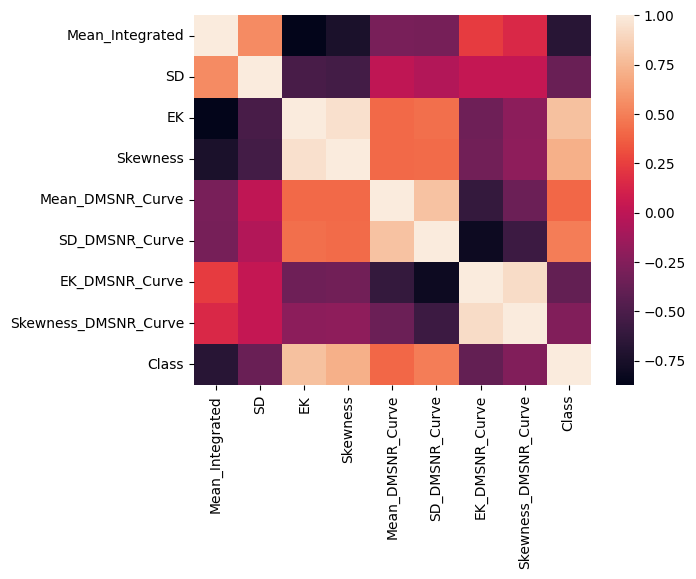

In [19]:
sns.heatmap(df.corr())

**Interpretation**

**High Correlation with class:**
1. EK
2. Skewness
3. Mean_Integrated

**High positive correlation:**
1. EK - Skewness
2. Mean_DMSNR_Curve - SD_DMSNR_Curve
3. EK_DMSNP_Curve - Skewness_DMSNR_Curve

**High negative correlation:**
1. EK_DMSNP_Curve - SD_DMSNR_Curve
2. EK - Mean_Integrated

---
**Dropping the features with max correlation with Class:**

Keep
1. Class,
2. SD,
3. EK,
4. SD_DMSNR_Curve,
5. Skewness_DMSNR_Curve

Drop
1. Mean_Integrated,
2. Skewness,
3. Mean_DMSNR_Curve,
4. EK_DMSNP_Curve


## Data Preprocessing

### Data Cleaning

**null value check and handling it with median imputation**

In [22]:
df.isnull().sum()

,0
Mean_Integrated,0
SD,1
EK,0
Skewness,1
Mean_DMSNR_Curve,0
SD_DMSNR_Curve,3
EK_DMSNR_Curve,0
Skewness_DMSNR_Curve,0
Class,0


In [23]:
df['SD']=df['SD'].fillna(df['SD'].median())
df['Skewness']=df['Skewness'].fillna(df['Skewness'].median())
df['SD_DMSNR_Curve']=df['SD_DMSNR_Curve'].fillna(df['SD_DMSNR_Curve'].median())

In [24]:
df.isnull().sum()

,0
Mean_Integrated,0
SD,0
EK,0
Skewness,0
Mean_DMSNR_Curve,0
SD_DMSNR_Curve,0
EK_DMSNR_Curve,0
Skewness_DMSNR_Curve,0
Class,0


**Duplicate value handing**

In [29]:
df.duplicated().sum()

np.int64(1)

In [30]:
df.drop_duplicates()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17894,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17895,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17896,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17897,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


### Normalization/Standardization of data

In [31]:
import sklearn.preprocessing as StandarScaler

In [41]:
scaler=StandarScaler.StandardScaler()

In [42]:
df_scaled=scaler.fit_transform(df)

In [43]:
type(df_scaled)

numpy.ndarray

In [44]:
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)

In [45]:
type(df_scaled)

pandas.core.frame.DataFrame

In [46]:
df_scaled.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,1.789900e+04,1.789900e+04,1.789900e+04,17899.000000,1.789900e+04,1.789900e+04,1.789900e+04,1.789900e+04,1.789900e+04
mean,3.493366e-17,4.025311e-16,-2.223051e-17,0.000000,3.175787e-17,-6.351575e-17,-1.016252e-16,6.351575e-17,-3.175787e-18
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-4.102585e+00,-3.181894e+00,-2.211762e+00,-0.577546,-4.208239e-01,-9.736948e-01,-2.539331e+00,-1.002982e+00,-3.175960e-01
25%,-3.955894e-01,-6.098367e-01,-4.237012e-01,-0.317684,-3.628066e-01,-6.107211e-01,-5.596312e-01,-6.562909e-01,-3.175960e-01
50%,1.559916e-01,5.813595e-02,-2.394189e-01,-0.254916,-3.329894e-01,-4.038792e-01,2.884081e-02,-2.045968e-01,-3.175960e-01
75%,6.239905e-01,6.538044e-01,-4.378152e-03,-0.136664,-2.426017e-01,1.079027e-01,5.325560e-01,3.234939e-01,-3.175960e-01
max,3.178041e+00,7.631691e+00,7.132518e+00,10.750576,7.151831e+00,4.330182e+00,5.822480e+00,1.019750e+01,3.148654e+00


### Feature Selection

In [49]:
df_scaled.corr()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
Mean_Integrated,1.000000,0.547317,-0.873964,-0.738924,-0.298884,-0.307200,0.234496,0.144153,-0.673350
SD,0.547317,1.000000,-0.521643,-0.539991,0.006775,-0.047849,0.029604,0.027803,-0.363966
EK,-0.873964,-0.521643,1.000000,0.945767,0.414362,0.433048,-0.341351,-0.214600,0.791717
Skewness,-0.738924,-0.539991,0.945767,1.000000,0.412045,0.415323,-0.328993,-0.204896,0.709711
Mean_DMSNR_Curve,-0.298884,0.006775,0.414362,0.412045,1.000000,0.796544,-0.615985,-0.354294,0.400887
SD_DMSNR_Curve,-0.307200,-0.047849,0.433048,0.415323,0.796544,1.000000,-0.809807,-0.575823,0.491677
EK_DMSNR_Curve,0.234496,0.029604,-0.341351,-0.328993,-0.615985,-0.809807,1.000000,0.923743,-0.390936
Skewness_DMSNR_Curve,0.144153,0.027803,-0.214600,-0.204896,-0.354294,-0.575823,0.923743,1.000000,-0.259207
Class,-0.673350,-0.363966,0.791717,0.709711,0.400887,0.491677,-0.390936,-0.259207,1.000000


**Columns to be dropped**
1. Mean_Integrated,
2. Skewness,
3. Mean_DMSNR_Curve,
4. EK_DMSNR_Curve

In [51]:
df_scaled.drop(['Mean_Integrated', 'Skewness', 'Mean_DMSNR_Curve', 'EK_DMSNR_Curve'], axis=1)

,SD,EK,SD_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,1.334805,-0.669555,-0.370747,-0.287385,-0.317596
1,1.802178,-0.011977,-0.589035,0.211636,-0.317596
2,-1.053041,-0.145382,-0.235456,-0.391321,-0.317596
3,1.553199,-0.513443,-0.275793,-0.481248,-0.317596
4,-0.858623,0.115377,-0.763213,1.386851,-0.317596
...,...,...,...,...,...
17894,1.943179,-0.625654,-0.727399,1.700092,-0.317596
17895,0.429152,-0.328923,0.939739,-0.906522,-0.317596
17896,1.956113,-0.299435,1.671345,-0.941278,-0.317596
17897,1.074516,-0.260164,-0.664964,0.275904,-0.317596


## Data Splitting

In [53]:
from sklearn.model_selection import train_test_split

In [70]:
X=df_scaled[['SD', 'EK', 'SD_DMSNR_Curve', 'Skewness_DMSNR_Curve']]
y=df['Class']

In [71]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

**Interpretation:**

I am Choosing to build Random Forest Model that comes under ensemble ML techniques as it is capable of working with the imbalanced data. Pulsars are extremely rare instances in the dataset hence we need to use a superior Supervised ML model that can perform classification without dropping the recall and precision as gettting Accuracy in this case is pretty easy (model can lie stating class 0 and wont get caught 8-9/10 times)



**As this is a classification problems we will be using Random Forest Classifier and not the Regressor.**

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
model=RandomForestClassifier(n_estimators=500, max_depth=None, random_state=42)

In [74]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [76]:
y_pred=model.predict(X_test)

## Evaluation

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("classification_report: ", classification_report(y_test, y_pred))

Accuracy:  0.9835195530726257
Confusion Matrix: 
 [[3223   25]
 [  34  298]]
classification_report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99      3248
           1       0.92      0.90      0.91       332

    accuracy                           0.98      3580
   macro avg       0.96      0.94      0.95      3580
weighted avg       0.98      0.98      0.98      3580

